In [2]:
import turicreate as tc

In [3]:
image_data = tc.SFrame('../input/basicml-lecture1/Lecture_8/image_train_data')
test = tc.SFrame('../input/basicml-lecture1/Lecture_8/image_test_data')

In [4]:
image_data['label'].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


### Question 1: [1]Bird

In [5]:
cat_train = image_data[ image_data['label'] == 'cat' ]
dog_train = image_data[ image_data['label'] == 'dog' ]
auto_train = image_data[ image_data['label'] == 'automobile' ]
bird_train = image_data[ image_data['label'] == 'bird' ]

In [7]:
cat_model = tc.nearest_neighbors.create(cat_train, features = ['deep_features'], label = 'id')
dog_model = tc.nearest_neighbors.create(dog_train, features = ['deep_features'], label = 'id')
auto_model = tc.nearest_neighbors.create(auto_train, features = ['deep_features'], label = 'id')
bird_model = tc.nearest_neighbors.create(bird_train, features = ['deep_features'], label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [9]:
cat_model.query(test[0:1])[0]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 9.254ms      |

| Done         |         | 100         | 52.831ms     |

{'query_label': 0,
 'reference_label': 16289,
 'distance': 34.62371920804245,
 'rank': 1}

+--------------+---------+-------------+--------------+

,SArray
0,

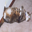

In [10]:
image_data[ image_data['id'] == 16289 ]['image'].explore()

### Question 2: [6]

In [11]:
dog_model.query(test[0:1])[0]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 10.948ms     |

| Done         |         | 100         | 49.424ms     |

{'query_label': 0,
 'reference_label': 16976,
 'distance': 37.464262878423774,
 'rank': 1}

+--------------+---------+-------------+--------------+

,SArray
0,

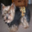

In [12]:
image_data[ image_data['id'] == 16976 ]['image'].explore()

### Question 3: [4]

In [13]:
cat_model.query(test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 11.402ms     |

| Done         |         | 100         | 50.422ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

### Question 4: [2] 35 to 37

In [14]:
dog_model.query(test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 11.584ms     |

| Done         |         | 100         | 52.565ms     |

+--------------+---------+-------------+--------------+

37.77071136184156

### Question 5: [3]37 to 39
### Question 6: cat (36.15573070978294 < 37.77071136184156)

In [15]:
dog_test = test[ test['label'] == 'dog' ]

id,image,label,deep_features,image_array
12,Height: 32 Width: 32,dog,"[0.3223174810409546, 0.0,1.2493335008621216, 0.0, ...","[91.0, 64.0, 30.0, 82.0,58.0, 30.0, 87.0, 73.0, ..."
16,Height: 32 Width: 32,dog,"[0.0, 0.0,0.34735703468322754, ...","[95.0, 76.0, 78.0, 92.0,77.0, 78.0, 89.0, 77.0, ..."
24,Height: 32 Width: 32,dog,"[1.3155765533447266, 0.0,0.0, 0.0, 0.0, 0.0, ...","[136.0, 134.0, 118.0,142.0, 141.0, 126.0, ..."
31,Height: 32 Width: 32,dog,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 9.260188102722168, ...","[127.0, 130.0, 81.0,130.0, 133.0, 88.0, ..."
33,Height: 32 Width: 32,dog,"[0.1307867169380188,0.7276672124862671, 0.0, ...","[118.0, 113.0, 81.0,122.0, 117.0, 83.0, ..."
39,Height: 32 Width: 32,dog,"[0.011272192001342773,0.0, 0.7608823180198669, ...","[72.0, 88.0, 97.0, 55.0,70.0, 84.0, 61.0, 73.0, ..."
42,Height: 32 Width: 32,dog,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 8.335664749145508, ...","[149.0, 149.0, 150.0,149.0, 149.0, 146.0, ..."
85,Height: 32 Width: 32,dog,"[0.0,0.29846465587615967, ...","[113.0, 174.0, 228.0,113.0, 174.0, 227.0, ..."
101,Height: 32 Width: 32,dog,"[0.5911874771118164, 0.0,0.0, 0.0, ...","[60.0, 77.0, 93.0, 60.0,76.0, 92.0, 58.0, 74.0, ..."
128,Height: 32 Width: 32,dog,"[0.0, 0.0,0.07171213626861572, ...","[86.0, 18.0, 39.0, 84.0,18.0, 38.0, 82.0, 16.0, ..."


In [17]:
distance = tc.SFrame({'dog-cat': cat_model.query(dog_test, k=1)['distance'], 'dog-dog': dog_model.query(dog_test, k=1)['distance'], 
                      'dog-auto': auto_model.query(dog_test, k=1)['distance'], 'dog-bird': bird_model.query(dog_test, k=1)['distance']})

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 385.437ms    |

| Done         | 509000  | 100         | 408.323ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 411.119ms    |

| Done         | 509000  | 100         | 422.921ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 387.966ms    |

| Done         | 509000  | 100         | 406.028ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 120000  | 25.1046     | 354.893ms    |

| Done         | 478000  | 100         | 398.63ms     |

+--------------+---------+-------------+--------------+

dog-auto,dog-bird,dog-cat,dog-dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [18]:
distance['label'] = tc.SArray([min(distance[i], key=distance[i].get) for i in range(len(dog_test))])

In [21]:
distance[100:110]

dog-auto,dog-bird,dog-cat,dog-dog,label
40.68597234991013,37.14623133363155,33.75491308637689,34.19537864183893,dog-cat
35.257159587789864,35.994125633376164,33.565472809772714,34.84337519553998,dog-cat
44.16513203747479,40.32330035157369,38.04936433625223,40.89952486033307,dog-cat
39.2506486316275,35.42416998389194,32.623304056984196,30.084785350560747,dog-dog
44.936584620850326,40.96258982402298,36.87096606183141,36.59236842615159,dog-dog
42.33986806905631,37.52494903464275,32.89803727249493,31.799526430681894,dog-dog
41.04507876180724,36.53380022952177,34.5119182744401,32.59733061164728,dog-dog
40.70159448677636,39.628792960323196,36.43508359618369,37.335393282756506,dog-cat
44.212541127599046,40.41276630639736,39.56484514805088,38.72706389160401,dog-dog
40.96697112461108,41.09681059571404,38.537528391518364,36.284473266572476,dog-dog


In [23]:
len(distance[ distance['label'] == 'dog-cat' ])

248

In [22]:
len(distance[ distance['label'] == 'dog-dog' ])/len(dog_test)

0.678

### Question 7: [2] 60 to 70